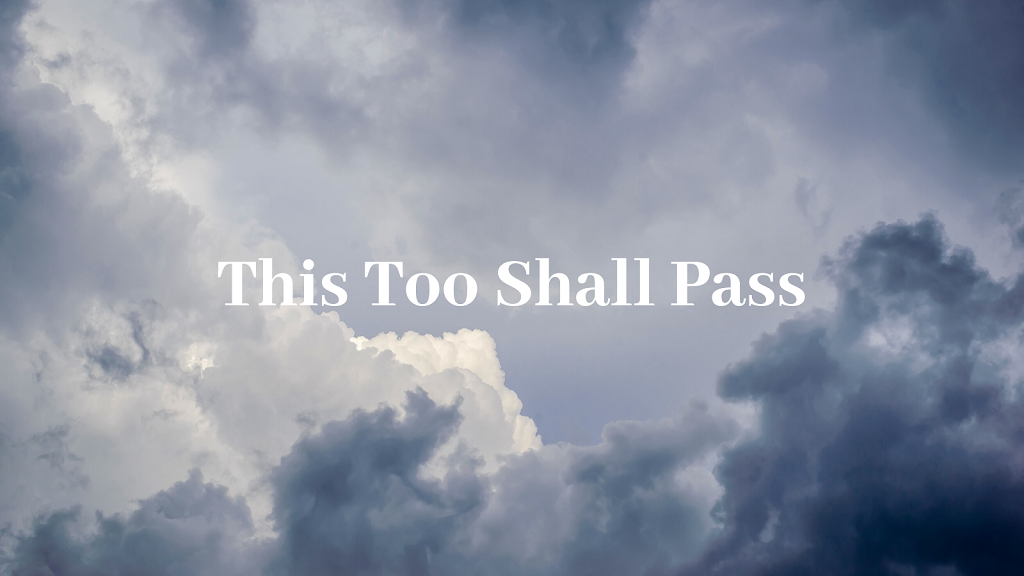

# This Too Shall Pass: The markov chain way :) 

<br>

What's the one sentence that can make both a happy and sad person grounded, that would be "THIS SHALL TOO PASS". But, it's just not "nerdy" enough to say it plainly like it, so we will be using Markov Chain and it's properties to discuss this is more detail. 

<br>

In [1]:
import pandas as pd 
import numpy as np 

### Creating the class MarkovChain

In [4]:
class MarkovChain():
    
    def __init__(self, init_probs, trans_matrix):
        self.init_probs = init_probs
        self.transition_matrix = trans_matrix 
        
    def get_transition_matrix(self):
        """
        This is to visualize the transition matrix in a nice rectangular form 
        """
        return pd.DataFrame(self.transition_matrix).T
    
    def calculate_state(self, time):
        """
        Calculates the state after time intervel t 
        """
        p_values_happy = []
        p_values_sad = []
        
        
        for t in range(time):
            if t == 0:
                # for the first state, the current states would be equal to the init probs
                p_happy = self.init_probs['happy']
                p_sad = self.init_probs['sad']
                current_state = self.init_probs
                
            else:
                # the current state would depend on the last state (markov process)
                p_happy = self.transition_matrix['happy']['happy']*current_state['happy'] + \
                            self.transition_matrix['sad']['happy']*current_state['sad']
                p_sad = self.transition_matrix['happy']['sad']*current_state['happy'] + \
                        self.transition_matrix['sad']['sad']*current_state['sad']

                current_state = {'happy':p_happy, 'sad':p_sad}
            
            p_values_happy.append(round(p_happy,2))
            p_values_sad.append(round(p_sad,2))
            
        history = (p_values_happy, p_values_sad)
        return current_state, history

### WHEN I AM REALLY HAPPY :) 

Let's start with the case when one is really happy, and see how the distributions vary as time progresses. 

In [5]:
init_states = {'happy':1, 'sad':0} #initial state would be p('happy')=1, p('sad') = 0

# transition matrix 
transition_matrix = {'happy':{'happy':0.9,'sad':0.1},
                     'sad':{'happy':0.3,'sad':0.7}}

In [6]:
# create a MarkovChain object using the above parameters
chain1 = MarkovChain(init_states, transition_matrix)

# print the properties of this markov chain
# this is just to get used with using the Class 
print(chain1.init_probs)
print(chain1.transition_matrix)
print("")
print(chain1.get_transition_matrix())

{'happy': 1, 'sad': 0}
{'happy': {'happy': 0.9, 'sad': 0.1}, 'sad': {'happy': 0.3, 'sad': 0.7}}

       happy  sad
happy    0.9  0.1
sad      0.3  0.7


- What would be the probablitiy distribution after 20 days?

In [7]:
state, history = chain1.calculate_state(20)

In [8]:
print(state)

{'happy': 0.7500152339935008, 'sad': 0.24998476600649988}


After 20 days, p(happy) is around 0.75, while p(sad) is around 25.

<b> So, if you are very (or max) happy today, after 20 days, your predicted state would be 75% happy, and 25% sad. 

### Let's visualize the result 

In [91]:
import matplotlib.pyplot as plt 

In [92]:
values_happy, values_sad = history

In [93]:
time = np.arange(len(values_happy))

(0.0, 1.0)

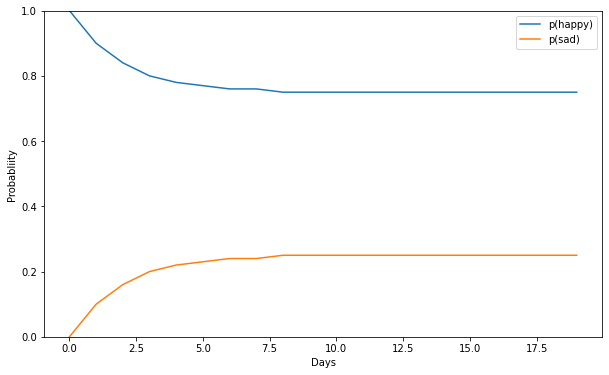

In [94]:
plt.figure(figsize = (10,6))
plt.plot(time, values_happy, label = 'p(happy)')
plt.plot(time, values_sad, label='p(sad)')
plt.xlabel("Days")
plt.ylabel("Probabliity")
plt.legend()
plt.ylim(0,1)

We can see from the above graph that initially the p(happy) was 1, while p(sad) was 0 on day 0. But as time proceeded, both of the probabilities tended to values of 0.75, 0.25 respectively which didn't seem to change as time increases. 

<b> So, while you were very estatic on day=0, it didn't last for much long, and along with time, it got balanced out. </b>

## HOW DIFFERENT THE RESULT WOULD BE IF YOU ARE SAD AT DAY=0???

Let's see

### WHEN IT"S A BAD DAY :( 

In [9]:
#since it's a bad day p(sad)=1, and p(happy)=0 (my mood is kind of always on the extremes)
init_states = {'happy':0, 'sad':1}  

transition_matrix = {'happy':{'happy':0.9,'sad':0.1},
                     'sad':{'happy':0.3,'sad':0.7}}

In [10]:
# creating a new markov chain using the paramters defined in the above cell
chain2 = MarkovChain(init_states, transition_matrix)


In [11]:
# let's run it for 20 days 
state, history = chain2.calculate_state(20)

In [12]:
print(state)

{'happy': 0.7499542980194994, 'sad': 0.2500457019805008}


We see that even when I started with the complete opposite init distributions, I get the same final distribution as in the first case. 

### Visualizing result 

(0.0, 1.0)

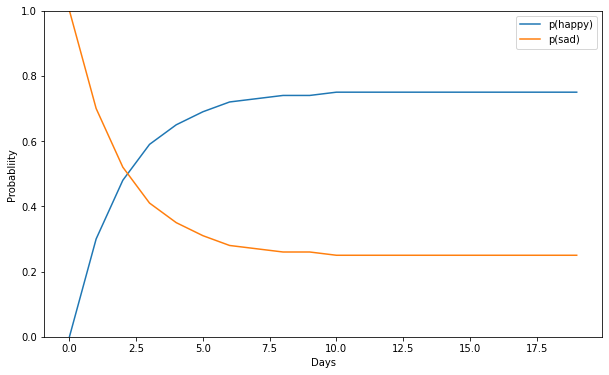

In [98]:
values_happy, values_sad = history

time = np.arange(len(values_happy))

plt.figure(figsize = (10,6))
plt.plot(time, values_happy, label = 'p(happy)')
plt.plot(time, values_sad, label='p(sad)')
plt.xlabel("Days")
plt.ylabel("Probabliity")
plt.legend()
plt.ylim(0,1)

Compaing this with the result above, we can see that although init distributions were different from each other, the final distribution tends to the same value as above

<b>In case, you are going a very bad phase, just remember that it is going to balance out in the long run. Well, just look at the graph for the proof 😎 </b>

# Let's try it out with different init probs 

### Creating a function 

In [99]:
def find_results_given_init_probs(init_probs):
    
    transition_matrix = {'happy':{'happy':0.9,'sad':0.1},
                     'sad':{'happy':0.3,'sad':0.7}}
    
    chain = MarkovChain(init_probs, transition_matrix)
    
    state, history = chain.calculate_state(20)
    
    values_happy, values_sad = history

    time = np.arange(len(values_happy))

    plt.figure(figsize = (12,8))
    plt.plot(time, values_happy, label = 'p(happy)')
    plt.plot(time, values_sad, label='p(sad)')
    plt.xlabel("Days")
    plt.ylabel("Probabliity")
    plt.legend()
    plt.ylim(0,1)

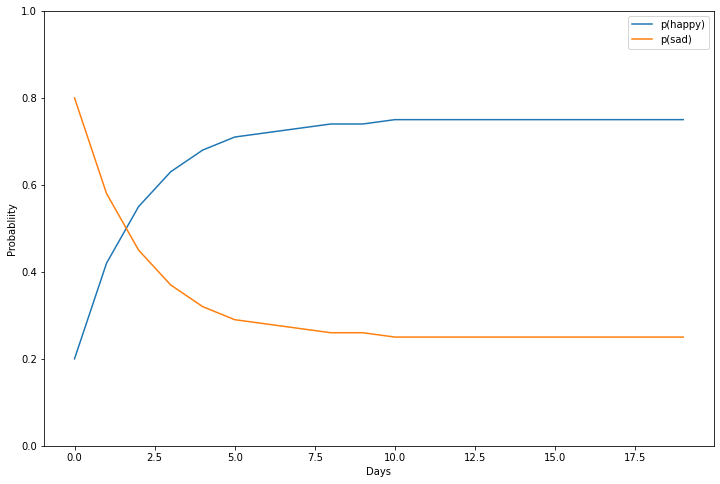

In [100]:
find_results_given_init_probs(init_probs={'happy':0.2, 'sad':0.8})

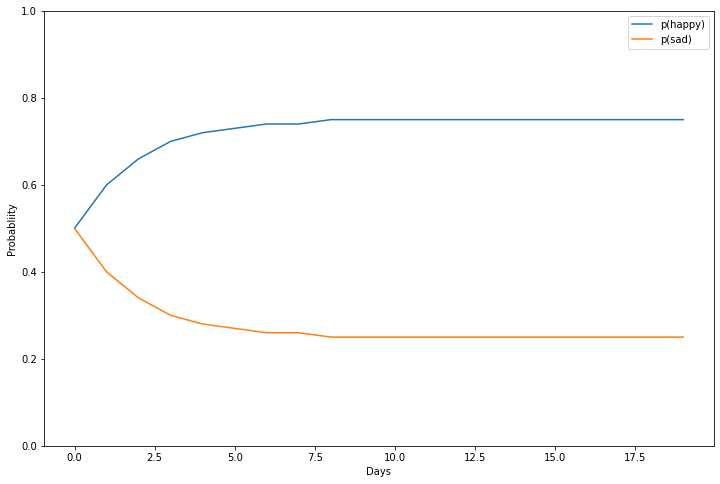

In [103]:
find_results_given_init_probs(init_probs={'happy':0.5, 'sad':0.5})

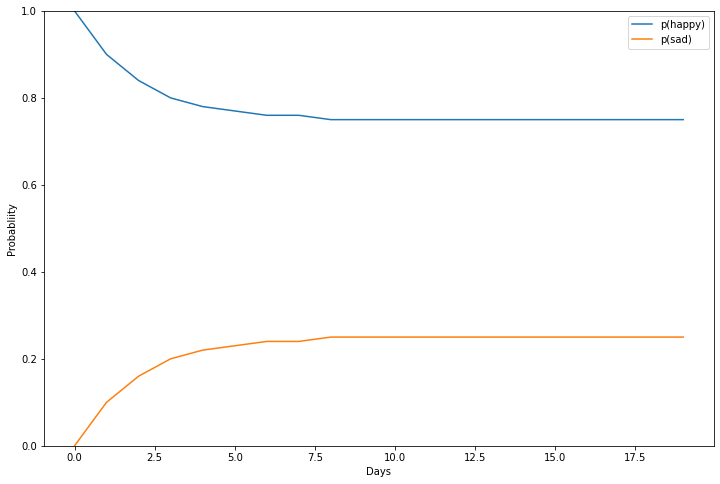

In [104]:
find_results_given_init_probs(init_probs={'happy':1, 'sad':0})

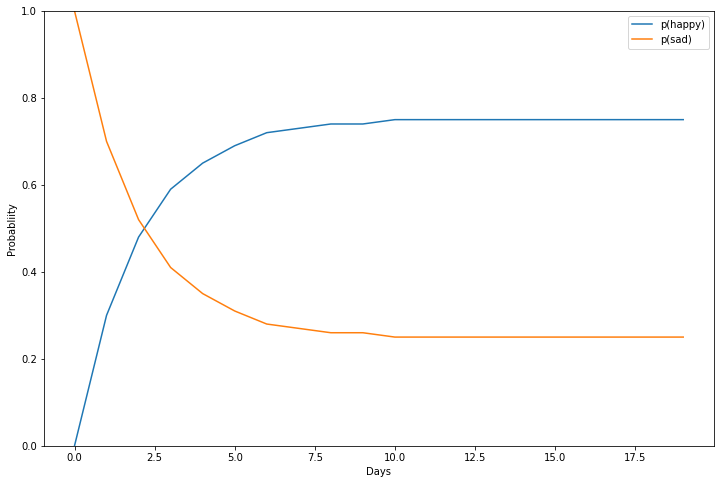

In [105]:
find_results_given_init_probs(init_probs={'happy':0, 'sad':1})

In all of the cases above, we see the same pattern we discussed above repeated. 

- Techincally speaking

<b> " For a markov chain, after a significant number of time steps, it will converge to a specific probablity distribution irrespective of what initial values were chosen"

<b> If you are feeling very happy today, stay grounded, it won't last for long. Similarly, if you are feeling very sad, just relax, it won't last for long. In the long term, it all balances out.  </b>

Here's a Sanskrit Shloka from the Markanadaya Purana which illustrates the same - 

### सुखानि दुःखोपशमाय भोगान्
### सुखाय जानाति विमूढचेताः।
### तान्येव दुःखानि पुनः सुखानि
### जानाति विद्धनविमूढचेताः॥

Meaning - 

The deluded look at objects of enjoyments as giving happiness by removing the unhappiness. The wise clearly see that the same object which gives happiness now will become a source of unhappiness later.

# Namaste